## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import datetime as dt
import requests
from collections import Counter

import os
API_key = os.environ.get('WWO_API_key')

In [2]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor
open_connection(params)

Connection was successful


(<connection object at 0x0000027AF08B0A68; dsn: 'user=lhl_student password=xxx dbname=mid_term_project host=mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x0000027AF0945048; closed: 0>)

In [3]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()

Connection was successful


In [4]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [5]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-11-07,AA,AA,AA,1986,AA,N122US,1986,14100,PHL,...,337.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-11-07,AA,AA,AA,1987,AA,N948UW,1987,14100,PHL,...,363.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-11-07,AA,AA,AA,1988,AA,N704US,1988,10423,AUS,...,1430.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-11-07,AA,AA,AA,1988,AA,N704US,1988,14100,PHL,...,1430.0,0.0,0.0,16.0,0.0,0.0,None,NaN,NaN,None
4,2018-11-07,AA,AA,AA,1989,AA,N192UW,1989,13303,MIA,...,919.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2018-11-07,UA,UA_CODESHARE,UA,5043,OO,N960SW,5043,11027,CKB,...,444.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1496,2018-11-07,UA,UA_CODESHARE,UA,5044,OO,N930SW,5044,13184,MBS,...,222.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1497,2018-11-07,UA,UA_CODESHARE,UA,5045,OO,N593ML,5045,13184,MBS,...,222.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1498,2018-11-07,UA,UA_CODESHARE,UA,5046,OO,N957SW,5046,14543,RKS,...,260.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [6]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [7]:
df['arr_delay'][df['arr_delay']> 150]

45       379.0
47       401.0
289      175.0
294      165.0
295      151.0
304      196.0
310      625.0
345     1148.0
382      281.0
657      293.0
696      224.0
723      263.0
1158     420.0
1205     153.0
1404     220.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

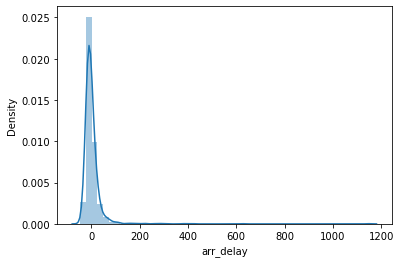

In [8]:
sns.distplot(df['arr_delay'])

In [9]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.8467942476272583, 1.292718056879081e-35)

In [10]:
stats.trim_mean(df['arr_delay'], 0.20)

-5.513333333333334

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
connection,cursor = open_connection(params)

months = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly
i='00'
for mon in range(1,13):
    print('working...')
    if mon < 10:
        i = '0' + str(mon)  # need to format single digits from '1' -> '01'    This can be changed but i forget offhand the SQL wildcard CHar for any OR NONE characters
    else:
        i = str(mon)
    query = f'''
    SELECT * FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    month.dropna(subset=['fl_date','dep_time'], inplace=True)
    months.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
working...
Connection closed, operation completed


In [13]:
months[0].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-09,DL,DL,DL,459,DL,N838MH,459,12478,JFK,...,2586.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
1,2018-01-13,UA,UA,UA,509,UA,N836UA,509,13930,ORD,...,733.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
2,2019-01-07,AA,AA_CODESHARE,AA,3744,MQ,N243NN,3744,11298,DFW,...,1272.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-07,UA,UA_CODESHARE,UA,5724,OO,N118SY,5724,11433,DTW,...,1123.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2019-01-07,UA,UA_CODESHARE,UA,3463,YX,N744YX,3463,11618,EWR,...,266.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
5,2019-01-09,AA,AA,AA,525,AA,N195UW,525,12889,LAS,...,1916.0,0.0,0.0,0.0,0.0,24.0,None,NaN,NaN,None
6,2019-01-04,AS,AS,AS,719,AS,N274AK,719,14869,SLC,...,689.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
7,2018-01-10,UA,UA_CODESHARE,UA,3415,YX,N752YX,3415,11618,EWR,...,529.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
8,2019-01-30,WN,WN,WN,1008,WN,N555LV,1008,14576,ROC,...,1079.0,0.0,0.0,24.0,0.0,0.0,None,NaN,NaN,None
9,2018-01-20,AA,AA_CODESHARE,AA,5297,OH,N589NN,5297,11057,CLT,...,177.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

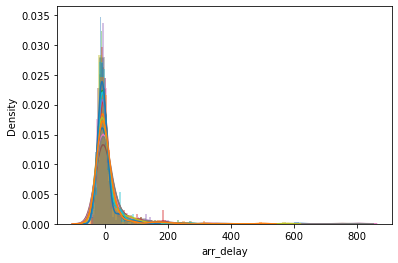

In [14]:
for month in months:
    sns.distplot(month['arr_delay'])

In [15]:
for i in range(12):
    print('month', i, 'mean:', stats.trim_mean(months[i]['arr_delay'], 0.20))  # trim_mean removes the N percent of either tails, in this case 20% to deal with outliers (then calculates mean)

print()  

for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i]['arr_delay'], 0.20)))      # median must be called as np.median(data), so trim_both only performs a trim

month 0 mean: -5.117977528089888
month 1 mean: -5.7298850574712645
month 2 mean: -5.936781609195402
month 3 mean: -3.4555555555555557
month 4 mean: -5.5307262569832405
month 5 mean: -2.2555555555555555
month 6 mean: -4.100558659217877
month 7 mean: -2.3954802259887007
month 8 mean: -6.640449438202247
month 9 mean: -5.368715083798882
month 10 mean: -7.611111111111111
month 11 mean: -4.728813559322034

month 0 median -7.0
month 1 median -6.0
month 2 median -7.0
month 3 median -4.0
month 4 median -6.0
month 5 median -3.5
month 6 median -5.0
month 7 median -3.0
month 8 median -7.0
month 9 median -7.0
month 10 median -7.0
month 11 median -5.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [16]:
import os
API_key = os.environ.get('WWO_API_key')  # Make Sure you make your own API key to try, if we share it will probably run out of daily limit too soon

In [17]:
month_df = months[0]
month_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-09,DL,DL,DL,459,DL,N838MH,459,12478,JFK,...,2586.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
1,2018-01-13,UA,UA,UA,509,UA,N836UA,509,13930,ORD,...,733.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
2,2019-01-07,AA,AA_CODESHARE,AA,3744,MQ,N243NN,3744,11298,DFW,...,1272.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-07,UA,UA_CODESHARE,UA,5724,OO,N118SY,5724,11433,DTW,...,1123.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2019-01-07,UA,UA_CODESHARE,UA,3463,YX,N744YX,3463,11618,EWR,...,266.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-08,AA,AA,AA,749,AA,N769US,749,14122,PIT,...,268.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
296,2019-01-11,DL,DL,DL,2891,DL,N339DN,2891,10397,ATL,...,1590.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
297,2019-01-22,AA,AA_CODESHARE,AA,3035,OO,N703SK,3035,11057,CLT,...,675.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
298,2019-01-30,AA,AA,AA,1435,AA,N908AA,1435,11298,DFW,...,190.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [18]:
# Finds correct index for WWO json for the right 3 hour period, in order to find weather description

# parameters(time (h,m))   returns (index(int))
def decide_time(time):
    if time[:-2] == '':
        h = 0
    else:
        h = int(time[:-2])
    # try:
    m = int(time[-2:])
    # except:
    #     print("ERROR: m is", time[-2:], '!!!')
        
    if m > 30 & h != 23:  # averages the hour up using minutes, unless it rolls over to next day (past 2400)
        h+1
    if h >= 21:
        return 7
    elif h >= 18:
        return 6
    elif h >= 15:
        return 5
    elif h >= 12:
        return 4
    elif h >= 9:
        return 3
    elif h >= 6:
        return 2
    elif h >= 3:
        return 1
    else:
        return 0   # Probably the worst function I've ever wrote, don't know python well enough to make this concise (enumerate instead?)

In [19]:
airports = pd.read_csv('airports.csv')  # found a database of airports, so with airport IATA code i can get the lat,lon coords for the actual weather around that airport
                                        # not just the whole city. Link to the database: https://davidmegginson.github.io/ourairports-data/airports.csv
def get_latlon(df):                     
    
    IATA = df.loc[0]['origin']          
    latlon = airports[airports['iata_code']==IATA][['latitude_deg','longitude_deg']].values[0]

    return latlon

In [20]:
def get_montly_weathers(months):
    for df in months:
        dep_datetime = get_dep_datetime(df)
        lat,lon = get_latlon(df)

        url = f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={API_key}&q={lat},{lon}&num_of_days=1&format=json"
        data = requests.get(url).json()
        weather = data['data']['current_condition'][0]['weatherDesc'][0]['value']
        weather 

In [21]:
def get_weatherDesc(row):
    date, time = row.loc['fl_date'], str(row.loc['dep_time'])[:-2]
    lat,lon = get_latlon(df)
    time_cursor = decide_time(time)
    
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={API_key}&q={lat},{lon}&date={date}&num_of_days=1&format=json"
    data = requests.get(url).json()
    data

    weather = data['data']['weather'][0]['hourly'][time_cursor]['weatherDesc'][0]['value']
    return weather 

In [23]:
for i in range(len(months)):
    print("Working", end='')
    for index,row in months[i].head(10).iterrows():
        print('.', end='')
        months[i].loc[index, 'dep_weather'] = get_weatherDesc(row)
    print()
print("Done!")

Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Done!


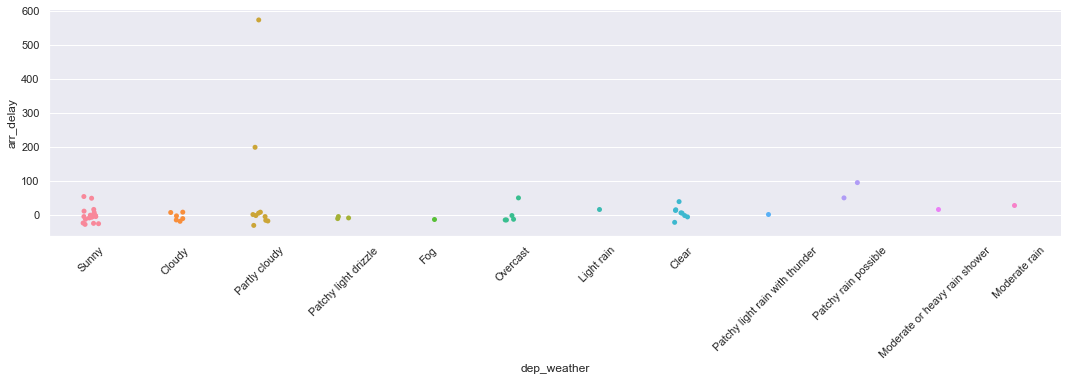

In [29]:
wdf = months[0].head()

for i in range(1,len(months)):
    wdf = wdf.append(months[i].head(), ignore_index=True)
sns.set()
sns.catplot(x="dep_weather", y="arr_delay", data=wdf, height=4, aspect=15/4)
plt.xticks(rotation=45)
plt.show()

In [30]:
# conds = wdf['dep_weather'].unique() 

# wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()

weather_count = Counter()

for condition in wdf['dep_weather'].unique():
    weather_count[condition] = wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()
    

for condition in wdf['dep_weather'].unique():
    print(condition,' percentage of delays: ', (weather_count[condition] / sum(weather_count.values()))*100, '%',sep='')

Sunny percentage of delays: 24.0%
Cloudy percentage of delays: 8.0%
Partly cloudy percentage of delays: 20.0%
Patchy light drizzle percentage of delays: 0.0%
Fog percentage of delays: 0.0%
Overcast percentage of delays: 4.0%
Light rain percentage of delays: 4.0%
Clear percentage of delays: 20.0%
Patchy light rain with thunder percentage of delays: 4.0%
Patchy rain possible percentage of delays: 8.0%
Moderate or heavy rain shower percentage of delays: 4.0%
Moderate rain percentage of delays: 4.0%


### ^^^ Looks like sunny weather has the most delays - interesting. Not much correllation between bad weather and arrival delay

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [31]:
for month in months:
    month['taxi_time'] = month['taxi_in'] + month['taxi_out']

month_df['taxi_time']

0      67.0
1      32.0
2      20.0
3      22.0
4      39.0
       ... 
295    18.0
296    28.0
297    27.0
298    17.0
299    35.0
Name: taxi_time, Length: 296, dtype: float64

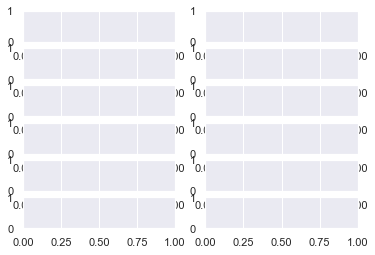

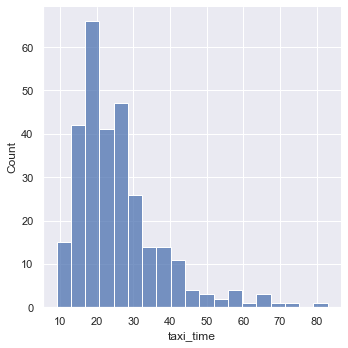

In [33]:
fig, axes = plt.subplots(nrows=6,ncols=2)

axes[0] = sns.displot(months[0]['taxi_time'], kind='hist', )   # This might be complicated to fix, but probably not

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [36]:
with_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] > 0)]['dep_delay'].count()
without_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] <= 0)]['dep_delay'].count()
total = (with_dep + without_dep)

print('Percentage of arrival delays with departure delay:   ', (with_dep/total)*100)
print('Percentage of arrival delays without departure delay:', (without_dep/total)*100)

Percentage of arrival delays with departure delay:    53.37301587301587
Percentage of arrival delays without departure delay: 46.62698412698413


                                   No surprise here ^^^

#### **Task 6**: How many states cover 50% of US air traffic? 

In [62]:
connection, cursor = open_connection(params)
query1 = 'SELECT origin, dest FROM flights ORDER BY random() LIMIT 1000;'

cursor.execute(query1)
data = cursor.fetchall()

connection.close()
print('Connection closed')

Connection was successful
Connection closed


In [63]:
df2 = pd.DataFrame(data, columns=['origin','dest'])
df2

,origin,dest
0,PHX,HNL
1,MCO,CLE
2,DTW,TPA
3,EWR,TPA
4,ORD,CLT
...,...,...
995,CLT,ATL
996,DFW,EWR
997,DEN,IND
998,ELM,IAD


In [64]:
state_count = Counter()

for IATA in df2['origin']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1
    
for IATA in df2['dest']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1

In [68]:
del state_count['PR-U-A'] # drop Puerto Rico (unincorporated US territory)
del state_count['VI-U-A'] # drop US Virgin Islands (unincorporated US territory)


total = sum(state_count.values())
cmltv_per = 0 # cumulative percentage initialized to 0
state_lst = [] # cumulative state percentage initialized to empty


for region in state_count.most_common(): # region is tuple (US-MI, 274) of US state and the count of arrivals/departures in that state.
    percent = (region[1]/total)*100 #calc percentage
    print(region[0],'  ', percent) 
    if cmltv_per<50: #cumulative percentage
        cmltv_per += percent
        state_lst.append(region[0])

print(state_lst, round(cmltv_per, 3), "Number of states covering 50% of US air traffic:", len(state_lst))

US-TX    11.629072681704262
US-CA    10.025062656641603
US-FL    7.067669172932331
US-IL    6.516290726817042
US-GA    6.015037593984962
US-NY    5.814536340852131
US-NC    4.862155388471178
US-CO    3.8095238095238098
US-DC    3.208020050125313
US-WA    3.208020050125313
US-PA    3.1578947368421053
US-AZ    2.756892230576441
US-MI    2.656641604010025
US-NV    2.4060150375939853
US-MN    2.2055137844611528
US-MO    1.954887218045113
US-OH    1.7543859649122806
US-TN    1.7543859649122806
US-NJ    1.6541353383458646
US-MA    1.6040100250626566
US-UT    1.5538847117794485
US-LA    1.3032581453634084
US-MD    1.2030075187969926
US-SC    1.1027568922305764
US-WI    0.9022556390977444
US-VA    0.9022556390977444
US-OR    0.8521303258145364
US-KY    0.8521303258145364
US-IN    0.8020050125313283
US-HI    0.7017543859649122
US-OK    0.7017543859649122
US-ID    0.5513784461152882
US-IA    0.5012531328320802
US-MT    0.4511278195488722
US-AL    0.4511278195488722
US-AK    0.3508771929824561
US

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [77]:
iata_count = Counter()

for IATA in df2['origin']:    # Count all flights with origin or destination having a specific airport IATA code
    iata_count[IATA] += 1
for IATA in df2['dest']:
    iata_count[IATA] += 1
    
top_airports = iata_count.most_common()[:10] # 10 most common
top_iatas = [i[0] for i in top_airports]
top_airports

[('ATL', 111),
 ('ORD', 87),
 ('DFW', 79),
 ('CLT', 72),
 ('DEN', 70),
 ('PHX', 52),
 ('SEA', 52),
 ('IAH', 51),
 ('LAX', 51),
 ('LGA', 43)]

In [78]:
top_iatas

['ATL', 'ORD', 'DFW', 'CLT', 'DEN', 'PHX', 'SEA', 'IAH', 'LAX', 'LGA']

In [85]:
total = sum(iata_count.values())
cmltv_per = 0

for airport in top_iatas: # region is tuple (IATA, 111) of airport code and the count of arrivals/departures in that airport.
    percent = (iata_count[airport]/total)*100 #calc percentage
    cmltv_per += percent
    print(airport,'  ', percent) 
print("\nTotal coverage: ", cmltv_per, '%', sep='')

ATL    5.55
ORD    4.35
DFW    3.95
CLT    3.5999999999999996
DEN    3.5000000000000004
PHX    2.6
SEA    2.6
IAH    2.55
LAX    2.55
LGA    2.15

Total coverage: 33.4%


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [96]:
# for month in months: # Something like this i think? for first three bullets?
#     print(month['']) # Do something with sum()/(rows-with-delays)

In [89]:
connection,cursor = open_connection(params)

query =  "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'fuel_comsumption';"
cursor.execute(query)
columns = cursor.fetchall()

fuel_months_df = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly

for i in range(1,13): # months
    query = f'''
    SELECT * FROM fuel_comsumption
    WHERE month = {i}
    ORDER BY random()
    LIMIT 15;;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    # month.dropna(subset=['fl_date','dep_time'], inplace=True)
    fuel_months_df.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
Connection closed, operation completed


In [93]:
fuel_months_df[0] # List of monthly Dataframes

,"(month,)","(airline_id,)","(unique_carrier,)","(carrier,)","(carrier_name,)","(carrier_group_new,)","(sdomt_gallons,)","(satl_gallons,)","(spac_gallons,)","(slat_gallons,)",...,"(sdomt_cost,)","(satl_cost,)","(spac_cost,)","(slat_cost,)","(sint_cost,)","(ts_cost,)","(tdomt_cost,)","(tint_cost,)","(total_cost,)","(year,)"
0,1,20447.0,U7,U7,USA Jet Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,667469.0,43725.0,711194.0,2018
1,1,19690.0,HA,HA,Hawaiian Airlines Inc.,3,15104660.0,0.0,7316195.0,0.0,...,29872091.0,0.0,14224772.0,0.0,14224772.0,44096863.0,29894018.0,14224772.0,44118790.0,2018
2,1,20409.0,B6,B6,JetBlue Airways,3,53977431.0,0.0,0.0,12900982.0,...,114612170.0,0.0,0.0,27393107.0,27393107.0,142005277.0,114629092.0,27393107.0,142022199.0,2018
3,1,20370.0,KAQ,KAQ,Kalitta Air LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1434317.0,6834833.0,8269150.0,2018
4,1,20177.0,PFQ,PFQ,Asia Pacific,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512160.0,512160.0,2016
5,1,20166.0,GFQ,GFQ,Gulf And Caribbean Cargo,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,152176.0,211456.0,363632.0,2017
6,1,20107.0,FX,FX,Federal Express Corporation,3,56990489.0,11439989.0,19820050.0,2154046.0,...,96924000.0,21150000.0,41200000.0,4594000.0,66944000.0,163868000.0,99393000.0,68733000.0,168126000.0,2015
7,1,20195.0,WI,WI,Sky Lease Cargo,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
8,1,20308.0,WE,WE,Centurion Cargo Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537169.0,537169.0,2016
9,1,20007.0,5Y,5Y,Atlas Air Inc.,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12025032.0,43357114.0,55382146.0,2017
